In [19]:
from time import time

# Fibonacci Sequence

## Recursive Implementation
Takes a long time to run, poor time complexity of 2^n

In [27]:
def fib(n):
    if n <= 2:
        return 1
    
    else:
        return fib(n-1) + fib(n-2)

s = time()    
op = fib(40)
e = time()

print(f"{op}, time taken:{e-s}s")

102334155, time taken:5.2787840366363525s



This is because when visualized, each subtree is calculated multiple times.

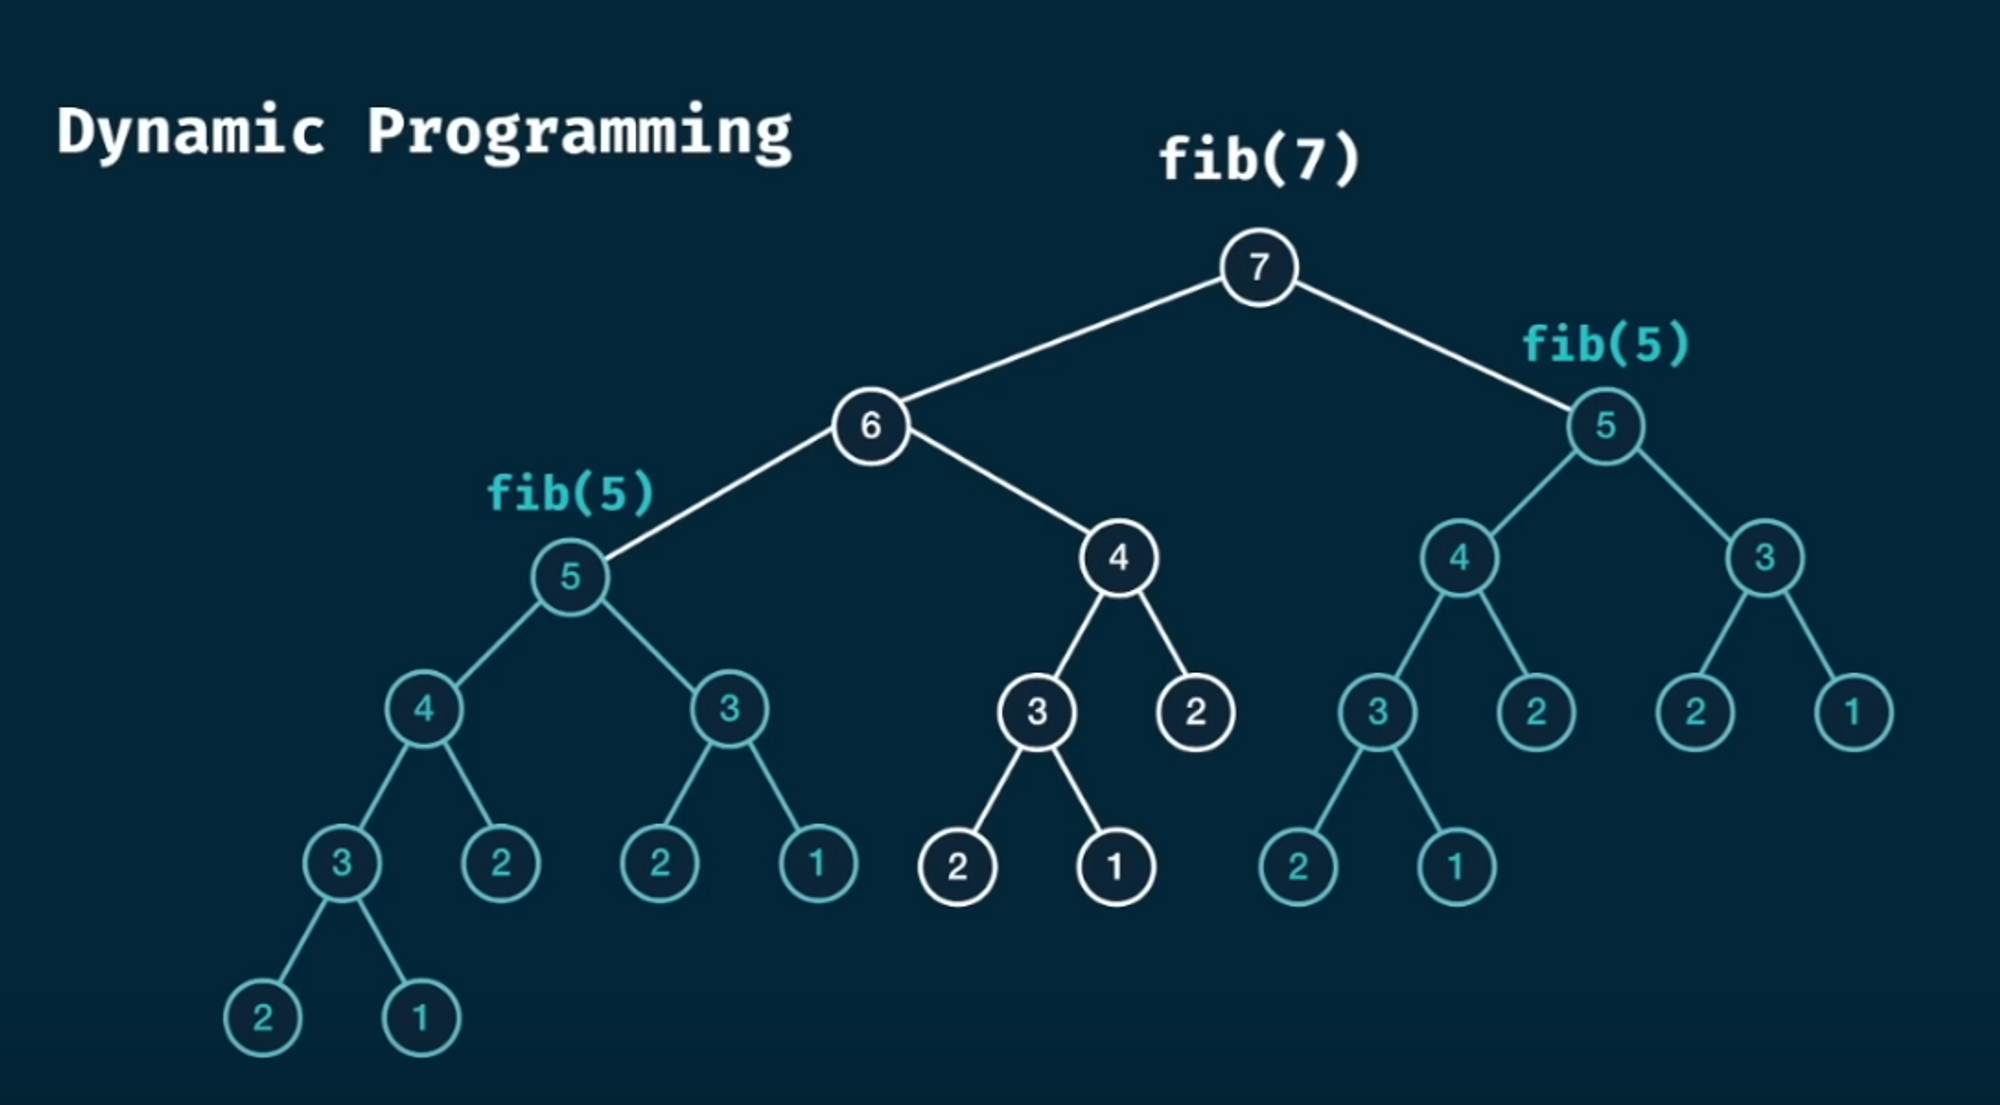

## Optimization Fibonnaci
When visualizing, we can see subtree repititons. If we were to save a subtree once it is calculated, we can use the saved tree for the repeating calculations to improve the speed.

Time complexity now is O(n)

In [28]:
# Memoization

def fib(n, memo={}):
    if n in memo:
        return memo[n]
    
    if n <= 2:
        return 1
    
    else:
        # Saving each subtree
        memo[n] = fib(n-1) + fib(n-2)
        return memo[n]
    
s = time()    
op = fib(40)
e = time()

print(f"{op}, time taken:{e-s}s")

102334155, time taken:4.100799560546875e-05s


On Visualizing

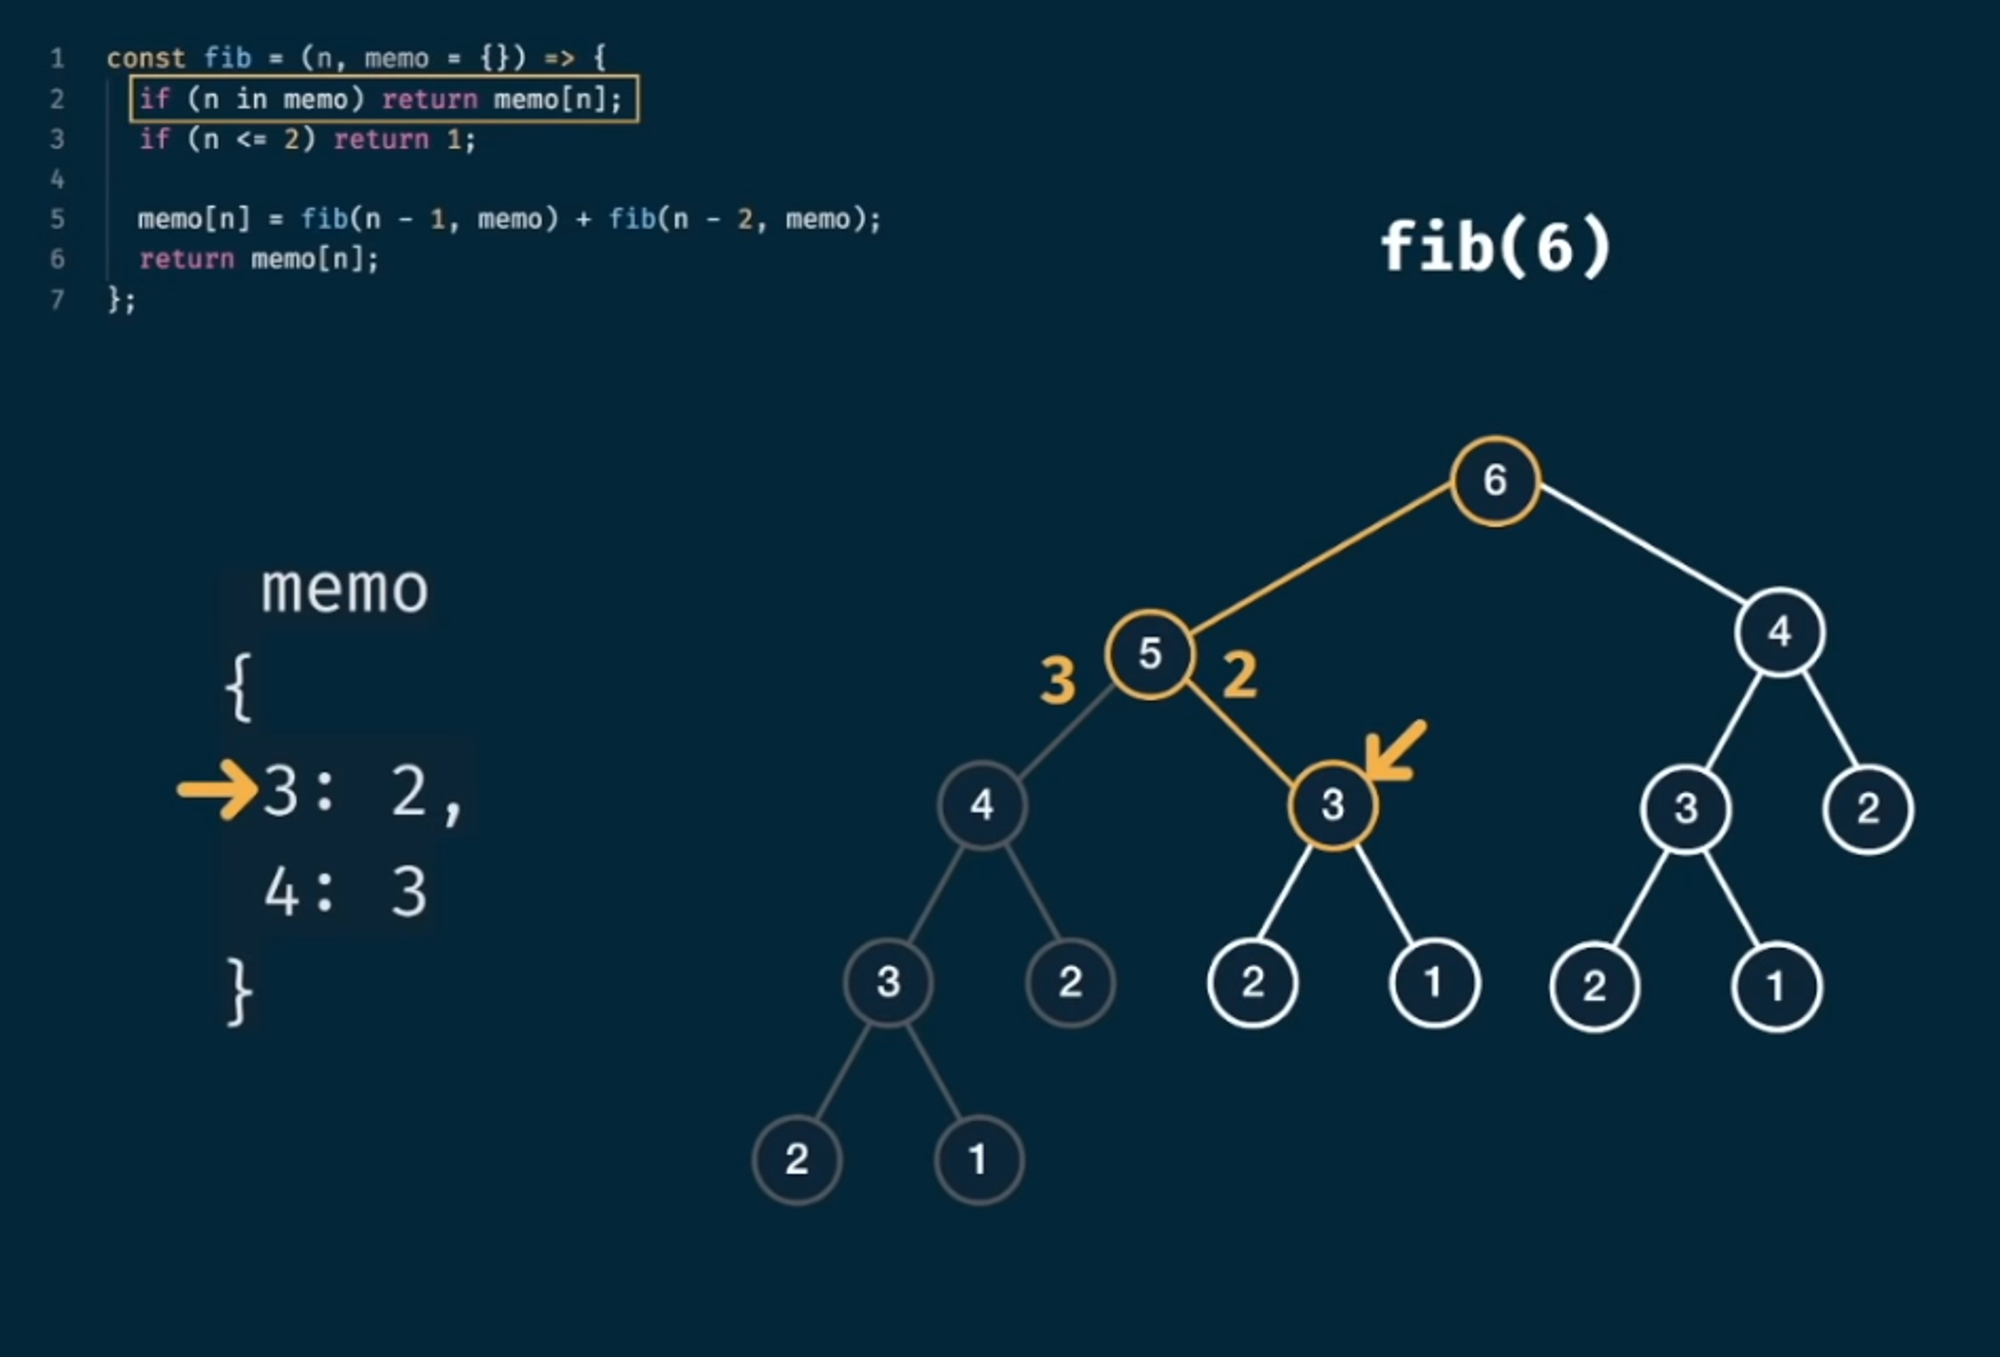

# Top Left to Bottom Right

Say that you are a traveler on a 2D grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right.

In how many ways can you travel to the goal on a grid with dimensions m * n?

Write a function `gridTraveler(m, n)` that calculates this.

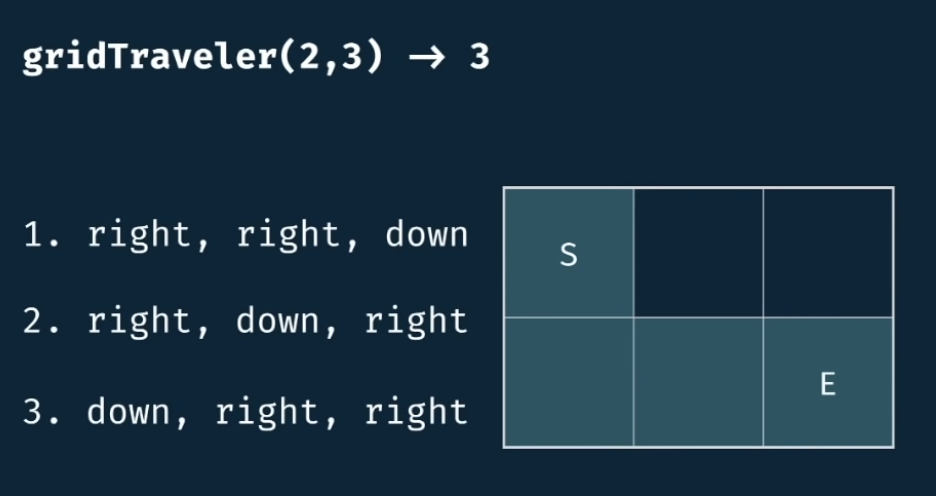

Visualizing the Problem for (2,3)

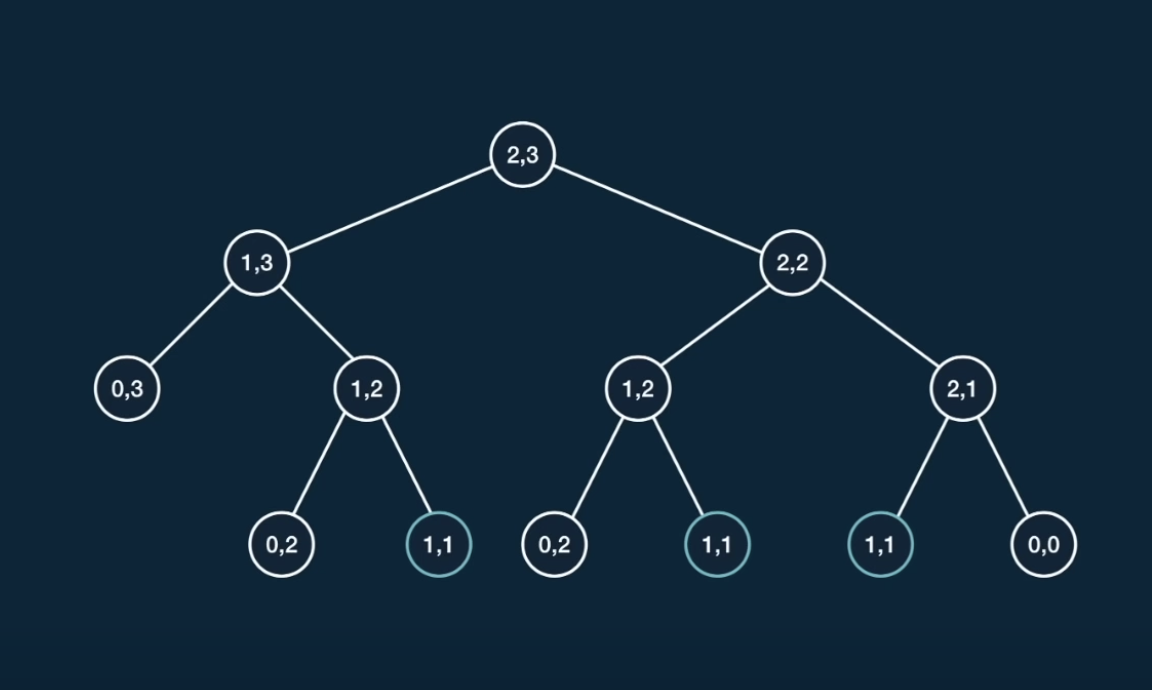

Having grid (1,1) is a base case because the O/P will be 1 (Start and End on same block). Having any dimension as 0 is also a base case as it then becomes 1D, therefore O/P is 0 again. Nodes with 1,1 or 0 in either dim become leaf nodes.

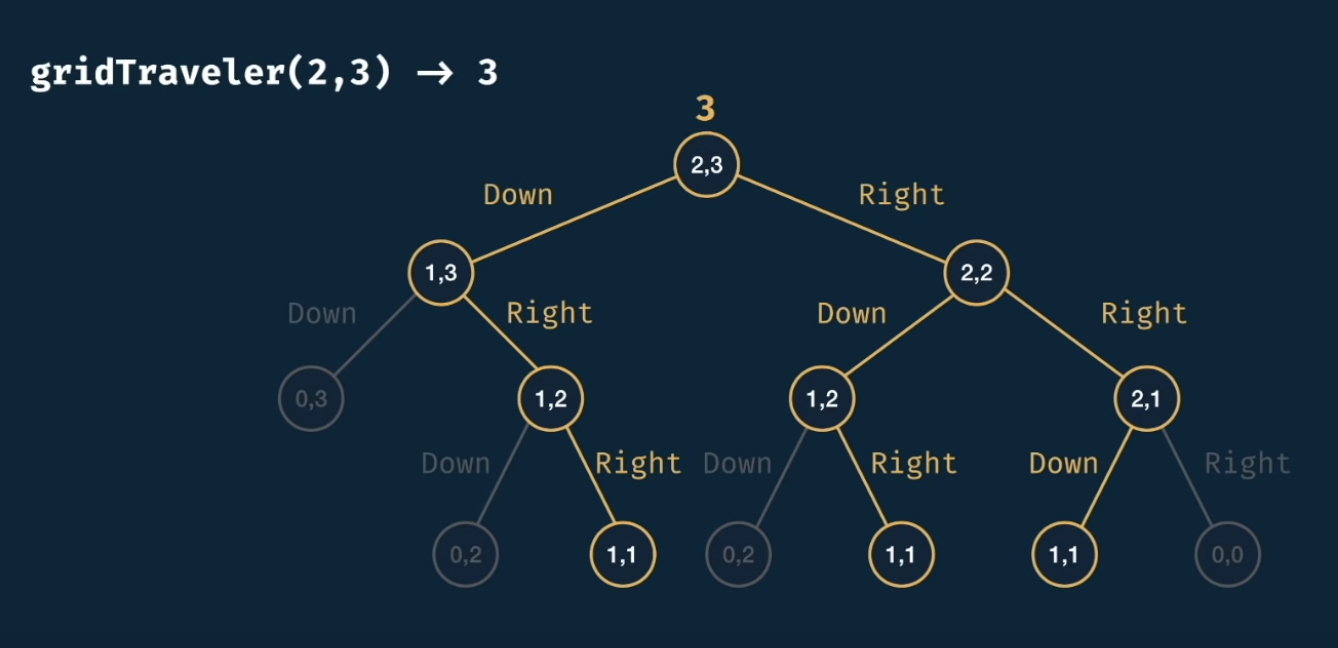

## Recursive Implementation

For each dimension, we are calculating the solutions to already solved grids again and again eg: 1,2 appears twice. Time complexity of O(2^n+m)

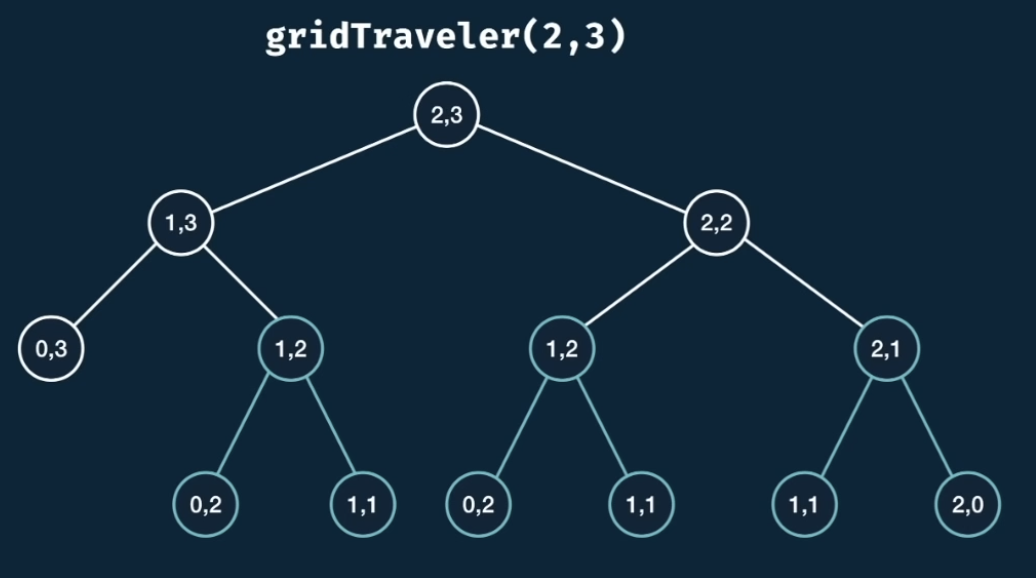

Also this problem is symmetric, 1,2 and 2,1 will give same O/P.

In [21]:
def gridTraveler(m, n):
    if m == 1 and n == 1:
        return 1
    
    if m == 0 or n == 0:
        return 0
    
    return gridTraveler(m - 1, n) + gridTraveler(m, n - 1)

s = time()
op = gridTraveler(m=15, n=15)
e = time()

print(f"{op}, time taken:{e-s}s")

40116600, time taken:8.650782823562622s


## Optimizing with Memoization

In [22]:
def gridTraveler(m, n, memo={}):
    # Making key using grid size.
    key = f"{m},{n}"
    
    if key in memo:
        return memo[key]
    
    if m == 1 and n == 1:
        return 1
    
    if m == 0 or n == 0:
        return 0
    
    # Storing solution for that m,n grid.
    memo[key] = gridTraveler(m - 1, n, memo) + gridTraveler(m, n - 1, memo)
    
    return memo[key]

s = time()
op = gridTraveler(m=15, n=15)
e = time()

print(f"{op}, time taken:{e-s}s")

40116600, time taken:0.00022983551025390625s


The new solution due it it calculating only the new grids has TIme Complexity of O(n+m).